<a href="https://colab.research.google.com/github/tejatanush/Heart-treatement-prediction/blob/main/Heart_treatment_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Treatment prediction
This model is capable of predicting which type of treatment is required for a person suffering fro heart disease with respective symptoms or features. This helps doctors easier to analyze the disease of patient and to make treatment  easily. Patients may also get analysed about their disease and get confidence by observing trends occured for persons who have suffered from respective heart disease earlier.

# Steps to build a model:
1. Import required libraries
2. Import dataset
3. Data Preprocessing
* Find and fill missing values
* Encoding data
* Feature Scaling
4. Dimensionality Reduction
5. Build a model  
* K-Mean Clustering  
Finding Optimal number of clusters  
Build a K-Mean clustering model  
Visualizing Clusters  
Evaluate K-Means cluster model  
* Hierarchical Clustering  
Finding Optimal number of clusters  
Build a Hierarchical clustering model  
Visualizing Clusters  
Evaluate Hierarchical cluster model  
6. Finalize the model


# 1. Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


# 2. Import dataset
This dataset contain many features like age,c,trestbps,chol,fbs,thalach,exang...etc.  
Reference: https://github.com/g-shreekant/Heart-Disease-Prediction-using-Machine-Learning/blob/master/heart.csv  


In [ ]:
data=pd.read_csv("heart_treatement_prediction.csv")
# Discard target column which is useless for our problem
dataset=data.iloc[:,0:13]
x=data.iloc[:,0:13].values
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


What above features represent?  
age: age of patient in years  
sex: sex (1 = male; 0 = female)  
cp: chest pain type  
        -- Value 1: typical angina  
        -- Value 2: atypical angina  
        -- Value 3: non-anginal pain  
        -- Value 4: asymptomatic  
trestbps: resting blood pressure (in mm Hg on admission to the hospital)  
chol: serum cholestoral in mg/dl  
fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)  
restecg: resting electrocardiographic results
        -- Value 0: normal  
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria  
thalach: maximum heart rate achieved  
exang: exercise induced angina (1 = yes; 0 = no)  
oldpeak = ST depression induced by exercise relative to rest  
slope: the slope of the peak exercise ST segment  
        -- Value 1: upsloping  
        -- Value 2: flat  
        -- Value 3: downsloping  
ca: number of major vessels (0-3) colored by flourosopy  
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect  

# 3. Data Preprocessing

# Find and filling missing values

In [ ]:
missing_values = dataset.isnull().sum()
print(missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


There are no any missing values in our dataset so we can skip this step.

# Encoding data
From our data we have categorical features and some label features. So that we should encode categorcal and label encoding in 2 steps.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
le=LabelEncoder()
column_to_encode=[1,5,8]
for column in column_to_encode:
  x[:,column]=le.fit_transform(x[:,column])
ct=ColumnTransformer(transformers=[('encoder1',OneHotEncoder(),[2]),('encoder2',OneHotEncoder(),[6]),('encoder3',OneHotEncoder(),[10]),('encoder4',OneHotEncoder(),[12])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
print(x[0])

[  0.    0.    0.    1.    1.    0.    0.    1.    0.    0.    0.    1.
   0.    0.   63.    1.  145.  233.    1.  150.    0.    2.3   0. ]


All the data in our dataset has been encoded for further processing in building a model.We can see the pattern of encoding.

# Feature Scaling
Let's Normalize age,trestbps,chol,thalach,oldpeak,ca.Because these are having unique numerical values and by normalizing them model may understand better patterns between them.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x[:,22]=sc.fit_transform(x[:,22].reshape(-1,1)).flatten()
x[:,14]=sc.fit_transform(x[:,14].reshape(-1,1)).flatten()
x[:,17]=sc.fit_transform(x[:,17].reshape(-1,1)).flatten()
x[:,16]=sc.fit_transform(x[:,16].reshape(-1,1)).flatten()
x[:,19]=sc.fit_transform(x[:,19].reshape(-1,1)).flatten()
x[:,21]=sc.fit_transform(x[:,21].reshape(-1,1)).flatten()
print(x)
print(x.shape)


[[0.         0.         0.         ... 0.         0.37096774 0.        ]
 [0.         0.         1.         ... 0.         0.56451613 0.        ]
 [0.         1.         0.         ... 0.         0.22580645 0.        ]
 ...
 [1.         0.         0.         ... 0.         0.5483871  0.5       ]
 [1.         0.         0.         ... 1.         0.19354839 0.25      ]
 [0.         1.         0.         ... 0.         0.         0.25      ]]
(303, 23)


So, the age,trestbps,chol,thalach,oldpeak,ca were normalized into values between 0 and 1.

#4. Dimensionality Reduction
In our dataset there are many features. Some of them are unwanted as they not show much impact on results. By using these features model may overfit. So lets reduce the number of inputs to our model by dimensionality reduction.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x = pca.fit_transform(x)

Here I am using PCA to reduce dimensionality to 2 components.This step will prevent the model from overfitting.

#5. Build a model

## Let's build both the model K-Means clustering and Hierarchical clustering and finalize the model with good results.

* # K-Mean Clustering

# Finding Optimal number of clusters
Let's use elbow method to find optimal number of clusters to use in K-mean clustering.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

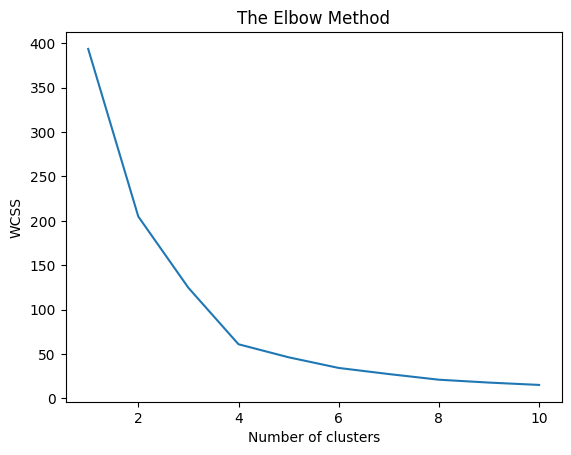

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can see that the line bends near 4. So optimal number of clusters to use are 4.

# Build a K-Mean clustering model

In [ ]:
kmeans=KMeans(n_clusters=4,init="k-means++",random_state=42)
y_kmeans=kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


We have completed building the model using K-Means. Now let's visualize the clusters formed

#Visualizing Clusters

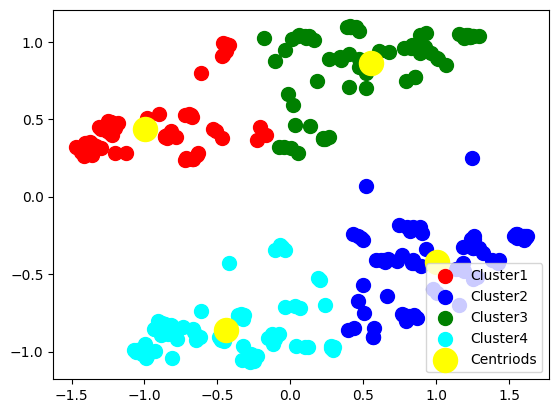

In [ ]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Cluster3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='cyan',label='Cluster4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centriods')
plt.legend()
plt.show()

Thus clusters are formed with centroids and the outline points of clusters are near to  outline points of another cluster.

# Evaluate K-Means cluster model

In [ ]:
from sklearn.metrics import davies_bouldin_score
score = davies_bouldin_score(x,y_kmeans)
print(score)

0.586317867197808


We got davies bouldin score of 0.59 which mean a good result.So, this model performed well.  

Now lets build a hierarchical cluster model.
* #  Hierarchical Clustering

# Finding Optimal number of clusters
Let's use dendrogram to find optimal number of clusters to use in Hierarchical clustering.

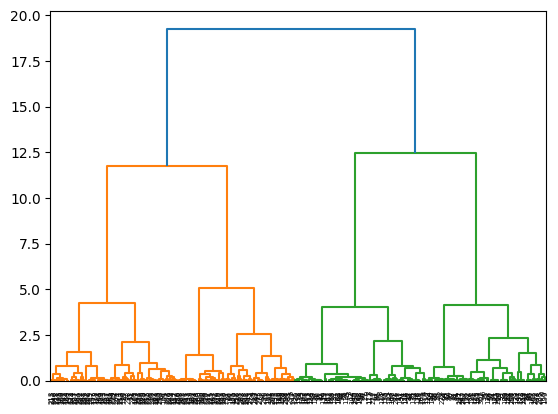

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.show()

We can see that there are 2 optimal clusters.  

# Build a Hierarchical clustering model

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


We have completed building the model using Hierarchical clustering. Now let's visualize the clusters formed



# Visualising the clusters

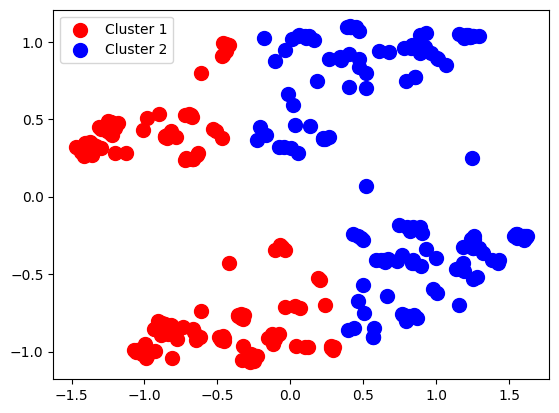

In [ ]:
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.legend()
plt.show()

# Evaluate Hierarchical cluster model

In [ ]:
from sklearn.metrics import davies_bouldin_score
labels=hc.labels_
score = davies_bouldin_score(x,labels)
print(score)

1.0296445311406022


# Finalize the model
Both the models performed well. But K-Means model perfomed better than hierarchical model with 0.59 score. So K-Means model is the best model for clustering this data and predicting type of treatement required for a patient suffering from heart disease.  